In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as mtick
import numpy as np

from plot_helpers import load_results, sup_label, _load_results_helper

# customizations
rcParams['axes.autolimit_mode'] = 'round_numbers'
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['axes.axisbelow'] = True
rcParams['font.family'] = 'serif'
rcParams['pdf.use14corefonts'] = True
rcParams['savefig.bbox'] = 'tight'
rcParams['font.size'] = 12.0
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

plt.style.use('tableau-colorblind10')

In [5]:
# omit Am241, Am242, Am242_m1, Cm242, Cm243, Cm245, Cm246
actinides = [
    'Th232', 'Th233', 'Pa233', 'U233',
    'U234', 'U235', 'U236', 'U238', 'U239', 'Np239',
    'Pu238', 'Pu239', 'Pu240', 'Pu241', 'Pu242',
    #'Am241', 'Am242', 'Am242_m1',
    'Am243', 'Am244',
    #'Cm242', 'Cm243', 
    'Cm244', #'Cm245',
    #'Cm246',
]

fission_products = [
    'Kr85', 'Sr90', 'Y90', 'Zr93', 'Mo95', 'Mo97', 
    'Tc99', 'Ru101', 'Ru106',
    'Rh103', 'Pd105', 'Pd107', 'Ag109',  'Cd113_m1', 'Sn121_m1', 
    'Sn126',
    'Te132', 'I129', 'I131', 'Xe131', 'Xe135', 
    'Cs133', 'Cs134', 
    'Cs135', 'Cs137',
    'La139', 'Ce142', 'Nd143', 'Nd145', 'Pm147', 'Sm149', 'Sm151',
    'Eu155', 'Gd158',
]

In [14]:
time[9]

15.0

In [29]:
def isotope_bar_plot(nuclides_dict, time, nuclides, filename, decimals=2, **kwargs):

    print(f'{filename}...')

    fig, ax = plt.subplots(**kwargs)
    burn_indices = (49, 98, 147, 196)
    #burn_indices = (17,39,55,73)
    #burn_indices = (237,)
    burnup = time
    ind = np.arange(len(nuclides))
    height = 1/(len(burn_indices)+1)
    for i, index in enumerate(burn_indices):
        data_base = np.array([nuclides_dict[nuc][1][index] for nuc in nuclides])
        data_case = np.array([nuclides_dict[nuc][0][index] for nuc in nuclides])
        diff = np.zeros_like(data_case)
        nonzero = data_case > 0.0
        diff[nonzero] = (data_case[nonzero] - data_base[nonzero])/data_base[nonzero]
        ax.barh(ind + i*height, diff, height, label=f'{burnup[index]} days')

    locs = ind + height*(len(burn_indices)/2 - 0.5)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals))
    if decimals >= 3:
        ax.xaxis.set_tick_params(rotation=30)
    ax.set_xlabel('(OpenMC - Serpent)/Serpent')
    ax.set_yticks(locs)
    ax.set_yticklabels([sup_label(x) for x in nuclides])
    ax.set_ylim(locs[0] - 0.5, locs[-1] + 0.5)
    ax.invert_yaxis()
    ax.legend()
    ax.grid()    
    fname = f'{filename}'

    plt.savefig(f'{fname}.pdf')
    plt.close(fig)

In [30]:
nuclides_dict, time = load_results('openmc_results/saltproc_runtime', 'serpent_results/saltproc_runtime', max_idx=237)
isotope_bar_plot(nuclides_dict, time, actinides, '../figs/ch5/actinides')
kwargs = {'figsize': (6.4, 10.0)}
isotope_bar_plot(nuclides_dict, time, fission_products, '../figs/ch5/fission_products', **kwargs)

../figs/ch5/actinides...
../figs/ch5/fission_products...


In [ ]:
nuclides_dict, time = load_results('openmc_results/saltproc_runtime', 'serpent_results/saltproc_runtime', max_idx=237)
isotope_bar_plot(nuclides_dict, time, actinides, '../figs/ch5/actinides')
kwargs = {'figsize': (6.4, 10.0)}
isotope_bar_plot(nuclides_dict, time, fission_products, '../figs/ch5/fission_products', **kwargs)

## Nuclide Investigations

In [18]:
_, openmc_nucs, time = _load_results_helper('openmc_results/saltproc_runtime')
_, serpent_nucs, _ = _load_results_helper('serpent_results/saltproc_runtime')

/tmp/ipykernel_420251/3787415765.py:15: RuntimeWarning: invalid value encountered in divide
  err = (omc_nuc - spn_nuc) / spn_nuc


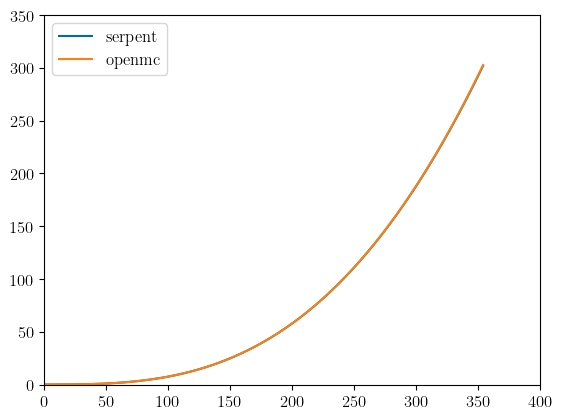

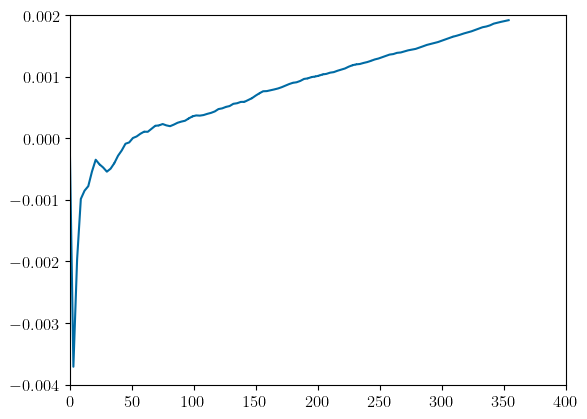

In [49]:
i=0
j = 237

tm = time[i:j]
nuc = 'U236'
omc_nuc = openmc_nucs[nuc][i:j]
spn_nuc = serpent_nucs[nuc][i:j]
fig, ax = plt.subplots()
ax.plot(tm, spn_nuc, label='serpent')
ax.plot(tm, omc_nuc, label='openmc')
ax.legend()


fig, ax = plt.subplots()
err = (omc_nuc - spn_nuc) / spn_nuc
for k in range(len(err)):
    if np.isnan(err[k]):
        if k == 0:
            err[k] = 0
        else:
            err[k] = err[k-1]
ax.plot(tm, err)

In [24]:
err

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
       -1.00000000e+00,  2.22730500e+03,  2.22730500e+03,  5.58723465e+02,
        5.58723465e+02])

In [59]:
np.isnan(err[0])

False

In [65]:
err

array([ 0.        , -0.00079774, -0.00079774, -0.00078812, -0.00078812,
       -0.00078127, -0.00078127, -0.00079755, -0.00079755, -0.00079648,
       -0.00079648, -0.00078807, -0.00078807, -0.00079142, -0.00079142,
       -0.00079129, -0.00079129, -0.00079811, -0.00079811, -0.00080101,
       -0.00080101, -0.00078671, -0.00078671, -0.00078595, -0.00078595,
       -0.04838316, -0.04838316, -0.00147144, -0.00147144, -0.00080155,
       -0.00080155, -0.00078878, -0.00078878, -0.00079799, -0.00079799,
       -0.00079253, -0.00079253, -0.00079711, -0.00079711, -0.00079548,
       -0.00079548, -0.00079355, -0.00079355, -0.00078871, -0.00078871,
       -0.00079093, -0.00079093, -0.0007957 , -0.0007957 , -0.00078768,
       -0.00078768, -0.00079047, -0.00079047, -0.00079608, -0.00079608,
       -0.00079726, -0.00079726, -0.00079074, -0.00079074, -0.00079113,
       -0.00079113, -0.00079379, -0.00079379, -0.00078781, -0.00078781,
       -0.00078868, -0.00078868, -0.00079933, -0.00079933, -0.00

In [64]:
(omc_nuc - spn_nuc)/spn_nuc

/tmp/ipykernel_419238/3215009254.py:1: RuntimeWarning: invalid value encountered in divide
  (omc_nuc - spn_nuc)/spn_nuc


array([        nan, -0.00079774,         nan, -0.00078812,         nan,
       -0.00078127,         nan, -0.00079755,         nan, -0.00079648,
               nan, -0.00078807,         nan, -0.00079142,         nan,
       -0.00079129,         nan, -0.00079811,         nan, -0.00080101,
               nan, -0.00078671,         nan, -0.00078595,         nan,
       -0.04838316,         nan, -0.00147144,         nan, -0.00080155,
               nan, -0.00078878,         nan, -0.00079799,         nan,
       -0.00079253,         nan, -0.00079711,         nan, -0.00079548,
               nan, -0.00079355,         nan, -0.00078871,         nan,
       -0.00079093,         nan, -0.0007957 ,         nan, -0.00078768,
               nan, -0.00079047,         nan, -0.00079608,         nan,
       -0.00079726,         nan, -0.00079074,         nan, -0.00079113,
               nan, -0.00079379,         nan, -0.00078781,         nan,
       -0.00078868,         nan, -0.00079933,         nan, -0.00